In [194]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import zipfile
import os
import datetime as dt
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
!curl https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip?accessType=DOWNLOAD>201601-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  51.6M      0 --:--:-- --:--:-- --:--:-- 51.7M


In [5]:
zip_ref = zipfile.ZipFile("201601-citibike-tripdata.zip", 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

In [80]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + '201601-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [8]:
!curl https://s3.amazonaws.com/tripdata/201608-citibike-tripdata.zip?accessType=DOWNLOAD>201608-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 53.4M  100 53.4M    0     0  38.0M      0  0:00:01  0:00:01 --:--:-- 38.0M


In [9]:
zip_ref = zipfile.ZipFile("201608-citibike-tripdata.zip", 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

In [81]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + '201608-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,288,8/1/2016 00:01:22,8/1/2016 00:06:11,302,Avenue D & E 3 St,40.720828,-73.977932,428,E 3 St & 1 Ave,40.724677,-73.987834,16920,Subscriber,1961.0,1
1,457,8/1/2016 00:01:43,8/1/2016 00:09:21,285,Broadway & E 14 St,40.734546,-73.990741,432,E 7 St & Avenue A,40.726218,-73.983799,20084,Subscriber,1989.0,2
2,278,8/1/2016 00:02:10,8/1/2016 00:06:49,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3096,Union Ave & N 12 St,40.719240,-73.952420,18380,Subscriber,1971.0,1
3,862,8/1/2016 00:02:13,8/1/2016 00:16:36,280,E 10 St & 5 Ave,40.733320,-73.995101,280,E 10 St & 5 Ave,40.733320,-73.995101,24101,Subscriber,1995.0,1
4,407,8/1/2016 00:02:21,8/1/2016 00:09:09,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,428,E 3 St & 1 Ave,40.724677,-73.987834,18949,Subscriber,1993.0,1


In [111]:
frames = [df1, df2]

In [112]:
# Taking 
df = pd.concat(frames)

In [113]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [114]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1557658,817,8/29/2016 14:51:22,8/29/2016 15:05:00,457,Broadway & W 58 St,40.766953,-73.981693,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,19548,Subscriber,1965.0,2
1557659,517,8/29/2016 14:54:48,8/29/2016 15:03:25,457,Broadway & W 58 St,40.766953,-73.981693,305,E 58 St & 3 Ave,40.760958,-73.967245,21077,Subscriber,1958.0,1
1557660,242,8/29/2016 15:33:18,8/29/2016 15:37:20,457,Broadway & W 58 St,40.766953,-73.981693,469,Broadway & W 53 St,40.763441,-73.982681,18038,Subscriber,1987.0,2
1557661,569,8/29/2016 15:47:35,8/29/2016 15:57:04,457,Broadway & W 58 St,40.766953,-73.981693,479,9 Ave & W 45 St,40.760193,-73.991255,25945,Subscriber,1972.0,1
1557662,2245,8/29/2016 16:25:46,8/29/2016 17:03:12,457,Broadway & W 58 St,40.766953,-73.981693,368,Carmine St & 6 Ave,40.730386,-74.002150,22631,Subscriber,1983.0,2


In [115]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [116]:
df['date'] = pd.to_datetime(df['starttime'])

In [119]:
#resetting index 
df.reset_index(inplace=True)

In [120]:
df['time'] = df['date'].dt.hour

In [143]:
df['TripDay'] = df['tripduration'][(df['usertype'] == 'Subscriber') & ((df['time'] > 6)  & (df['time'] < 19))]
df['TripNight'] = df['tripduration'][(df['usertype'] == 'Subscriber') & ((df['time'] >= 19) | (df['time'] <= 6))] 

In [144]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time,TripDay,TripNight
0,0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,0,NaN,923.0
1,1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,0,NaN,379.0
2,2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,0,NaN,589.0
3,3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,0,NaN,889.0
4,4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,0,NaN,1480.0


In [125]:
df_backup = df

In [158]:
df.drop(['stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'],axis =1, inplace = True)

In [165]:
df.columns

Index(['index', 'tripduration', 'starttime', 'usertype', 'date', 'time',
       'TripDay', 'TripNight'],
      dtype='object')

In [166]:
df.head()

,index,tripduration,starttime,usertype,date,time,TripDay,TripNight
0,0,923,1/1/2016 00:00:41,Subscriber,2016-01-01 00:00:41,0,NaN,923.0
1,1,379,1/1/2016 00:00:45,Subscriber,2016-01-01 00:00:45,0,NaN,379.0
2,2,589,1/1/2016 00:00:48,Subscriber,2016-01-01 00:00:48,0,NaN,589.0
3,3,889,1/1/2016 00:01:06,Subscriber,2016-01-01 00:01:06,0,NaN,889.0
4,4,1480,1/1/2016 00:01:12,Subscriber,2016-01-01 00:01:12,0,NaN,1480.0


In [147]:
# dropping NaN values
df['tripduration'].dropna(inplace= True)
df['starttime'].dropna(inplace= True)

In [176]:
df['TripDay'].max()

3565469.0

In [178]:
df['TripNight'].max()

2497264.0

Text(0.5,1,'Night riders')

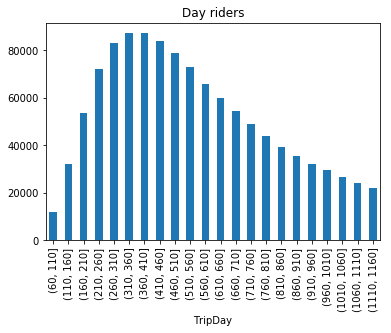

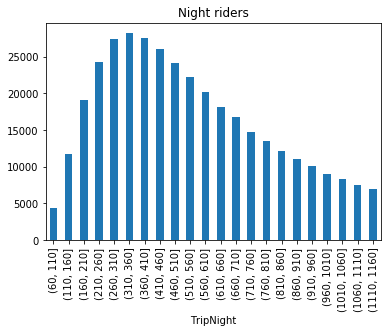

In [193]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60, 1200, 50)
axD = df.TripDay.groupby(pd.cut(df.TripDay, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("Day riders")
axN = df.TripNight.groupby(pd.cut(df.TripNight, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("Night riders")

**Figure 1:** Histogrammed distribution of Trip Duration by day and night riders. I could not plot all of it as max values are showing up 3 million and 2 million for day and night respectively.

### KS Test

In [205]:
ks = scipy.stats.ks_2samp(df.TripDay, df.TripNight)

In [196]:
ks

Ks_2sampResult(statistic=0.45676226246782392, pvalue=0.0)

**The KS statistic value is 0.46 and p-value is 0. Since p-value is zero, we can reject the null hypothesis. **

In [210]:
df.size / 200

82685.639999999999

In [211]:
# Reducing size of data by 200 times
df_reduced = df.iloc[:82685]

In [212]:
ks_reduced = scipy.stats.ks_2samp(df_reduced.TripDay, df_reduced.TripNight)

In [213]:
ks_reduced

Ks_2sampResult(statistic=0.5012033621575861, pvalue=0.0)

**The KS statistic value for the reduced data is 0.501 and p-value is 0. Since p-value is zero, we can reject the null hypothesis. **

### Pearson's Test for Correlation

In [216]:
TripD = np.array([a for a in df.TripDay if not np.isnan(a)])
TripN = np.array([b for b in df.TripNight if not np.isnan(b)])
NewTripD = np.random.choice(TripD, len(TripN), replace = False)

In [225]:
SortedD = np.sort(NewTripD)
SortedN = np.sort(TripN)

In [228]:
pear = scipy.stats.pearsonr(SortedD, SortedN)
pear

(0.96603790282328073, 0.0)

**The p-value is 0, so the Null hypothesis can be rejected. The Pearson correlation is 0.966, indicating strong postive correlation.**

### Spearman's Test for Correlation

In [222]:
spear = scipy.stats.spearmanr(df.TripDay, df.TripNight, axis=0)
spear

SpearmanrResult(correlation=-0.42643936497347346, pvalue=0.0)

**The p-value is 0, so the Null Hypothesis can be rejected. The Spearman correlation is -0.4264, indicating negative correlation, i.e. as trip duration increases, number of riders decrease. **